## Libraries import

In [2]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
import numpy as np
import matplotlib.pyplot as plt
import cv2
import random
import os

# hiding tensorflow warnings
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

## Dataset import

In [3]:
DATADIR = "/media/storage/datasets/math_symbols"
training_data = []
count_categories_elements = []
test_data = []

def create_training_data():
    categories = os.listdir(DATADIR)
    for category in categories:
        print(category)
        path = os.path.join(DATADIR, category)
        class_num = categories.index(category)
        count_categories_elements.append(0)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                training_data.append([img_array, class_num])
                count_categories_elements[class_num] += 1
            except Exception as e:
                print("Ошибка считывания изображения: ", img)

def create_test_data():
    shift = 0
    for amount in count_categories_elements:
        for i in range(shift, shift + round(amount * 0.1)):
            test_data.append([training_data[i][0], training_data[i][1]])
        del training_data[shift: shift + round(amount * 0.1)]
        shift += amount - round(amount * 0.1)

In [4]:
create_training_data()
create_test_data()

00.-
01.!
02.(
03.)
04.,
05.[
06.]
07.{
08.}
09.+
10.=
11.0
12.1
13.2
14.3
16.5
17.6
18.7
19.8
20.9
21.A
22.alpha
23.ascii_124
24.b
25.beta
26.C
27.cos
28.d
29.Delta
30.div
32.exists
33.f
34.forall
35.forward_slash
36.G
37.gamma
38.geq
39.gt
40.H
41.i
42.in
43.infty
44.int
45.j
47.l
48.lambda
49.ldots
50.leq
51.lim
52.log
53.lt
54.M
55.mu
56.N
57.neq
58.o
59.p
60.phi
61.pi
62.pm
63.prime
65.R
66.rightarrow
67.S
68.sigma
69.sin
70.sqrt
71.sum
72.T
73.tan
74.theta
75.times
76.u
77.v
78.w
79.X
80.y
81.z
15.4
31.e
46.k
64.q


## Data shuffle

In [5]:
random.shuffle(training_data)
random.shuffle(test_data)

## Train/test split

In [6]:
x_train = []
y_train = []
x_test = []
y_test = []

for inp, answ in training_data:
    x_train.append(inp)
    y_train.append(answ)
    
for inp, answ in test_data:
    x_test.append(inp)
    y_test.append(answ)

## Data prepocessing

In [7]:
x_train = np.array(x_train).reshape(-1, 45, 45, 1)
x_test = np.array(x_test).reshape(-1, 45, 45, 1)
print(x_train.shape)

x_train = x_train / 255.0
x_test = x_test / 255.0

y_train = keras.utils.to_categorical(np.array(y_train))
y_test = keras.utils.to_categorical(np.array(y_test))

(338375, 45, 45, 1)


## Checking data is valid

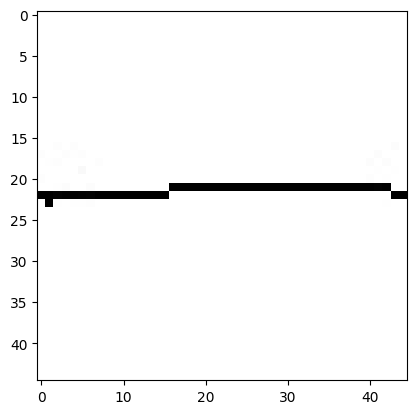

In [8]:
plt.imshow(x_train[1], cmap='gray')
plt.show()

## Model creation

In [10]:
model = keras.Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=x_train.shape[1:]),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2), strides=2),
    Conv2D(256, (3, 3), padding='same', activation='relu'),
    Flatten(),
    Dense(256, activation='relu'),
    Dense(82, activation='softmax')
])

setSGD = keras.optimizers.legacy.SGD(momentum=0.1, nesterov=True)

model.compile(optimizer=setSGD,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

## Model training

In [11]:
his = model.fit(x_train, y_train, batch_size=32, epochs=8, validation_split=0.2)

2023-12-02 21:40:57.161956: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2192670000 exceeds 10% of free system memory.
2023-12-02 21:40:58.707177: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2192670000 exceeds 10% of free system memory.


Epoch 1/8


2023-12-02 21:41:00.451697: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600
2023-12-02 21:41:01.011199: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:637] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


8460/8460 [==============================] - 40s 4ms/step - loss: 0.9525 - accuracy: 0.7574 - val_loss: 0.2754 - val_accuracy: 0.9222
Epoch 2/8
8460/8460 [==============================] - 36s 4ms/step - loss: 0.2231 - accuracy: 0.9339 - val_loss: 0.1895 - val_accuracy: 0.9420
Epoch 3/8
8460/8460 [==============================] - 36s 4ms/step - loss: 0.1523 - accuracy: 0.9532 - val_loss: 0.1428 - val_accuracy: 0.9563
Epoch 4/8
8460/8460 [==============================] - 39s 5ms/step - loss: 0.1165 - accuracy: 0.9632 - val_loss: 0.1145 - val_accuracy: 0.9643
Epoch 5/8
8460/8460 [==============================] - 38s 5ms/step - loss: 0.0937 - accuracy: 0.9701 - val_loss: 0.1023 - val_accuracy: 0.9665
Epoch 6/8
8460/8460 [==============================] - 38s 4ms/step - loss: 0.0800 - accuracy: 0.9742 - val_loss: 0.0893 - val_accuracy: 0.9724
Epoch 7/8
8460/8460 [==============================] - 38s 4ms/step - loss: 0.0690 - accuracy: 0.9774 - val_loss: 0.0987 - val_accuracy: 0.9697
Ep

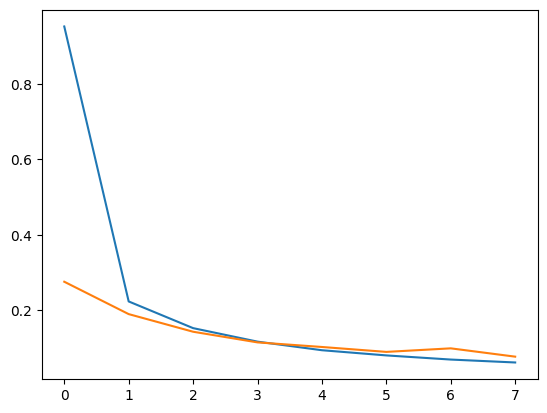

In [12]:
plt.plot(his.history['loss'])
plt.plot(his.history['val_loss'])
plt.show()

## Model evaluation

In [13]:
model.evaluate(x_test, y_test)

1175/1175 [==============================] - 3s 2ms/step - loss: 0.0683 - accuracy: 0.9797


[0.06830728054046631, 0.979706883430481]

## Model saving

In [14]:
model.save('model.h5')